In [1]:
!pip install BeautifulSoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 5.2 MB/s 


# finance-datareader

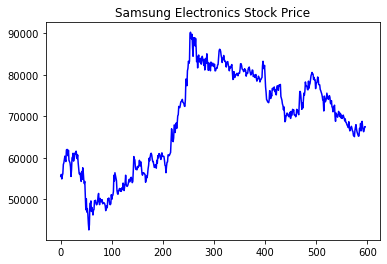

In [4]:
# 라이브러리 포함
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

# 삼성전자 코드='005930', 2020년 데이터부터 다운로드
samsung = fdr.DataReader('005930', '2020')

# 시작가만 취한다.
seq_data = (samsung[['Open']]).to_numpy()
# 선형 그래프로 그린다.
plt.plot(seq_data, color='blue')
plt.title("Samsung Electronics Stock Price")
plt.xlabel("days")
plt.xlabel("")
plt.show()

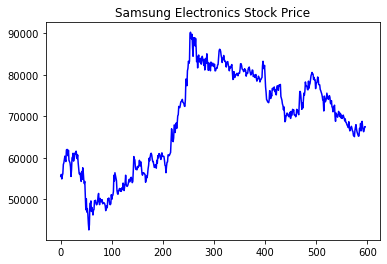

In [6]:
# 라이브러리 포함
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

# 삼성전자 코드='005930', 2020년 데이터부터 다운로드
samsung = fdr.DataReader('005930', '2020')

# 시작가만 취한다.
seq_data = (samsung[['Open']]).to_numpy()
# 선형 그래프로 그린다.
plt.plot(seq_data, color='blue')
plt.title("Samsung Electronics Stock Price")
plt.xlabel("days")
plt.xlabel("")
plt.show()


In [7]:
seq_data = (samsung[['Open']]).to_numpy()

def make_sample(data, window):
    train = []					# 공백 리스트 생성
    target = []
    for i in range(len(data)-window):		# 데이터의 길이만큼 반복
        train.append(data[i:i+window])		# i부터 (i+window-1) 까지를 저장
        target.append(data[i+window])		# (i+window) 번째 요소는 정답
    return np.array(train), np.array(target)	# 훈련 샘플과 정답 레이블을 반환

X, y = make_sample(seq_data, 7)		# 윈도우 크기=7
print(X.shape, y.shape)			# 넘파이 배열의 형상 출력
print(X[0], y[0])

(590, 7, 1) (590, 1)
[[55500]
 [56000]
 [54900]
 [55700]
 [56200]
 [58400]
 [58800]] [59600]


## 예제 : 사인파 예측 프로그램


In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

def make_sample(data, window):
    train = []					# 공백 리스트 생성
    target = []
    for i in range(len(data)-window):		# 데이터의 길이만큼 반복
        train.append(data[i:i+window])		# i부터 (i+window-1) 까지를 저장
        target.append(data[i+window])		# (i+window) 번째 요소는 정답
    return np.array(train), np.array(target)	# 파이썬 리스트를 넘파이로 변환

seq_data = []
for i in np.arange(0, 1000):
    seq_data += [[np.sin( np.pi * i* 0.01 )]]
X, y = make_sample(seq_data, 10)

Epoch 1/100
31/31 [==============================] - 2s 3ms/step - loss: 0.3325
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0720
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 11/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 12/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 13/100
31/31 [=================

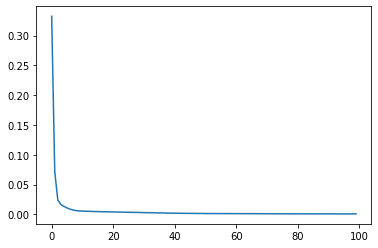

In [10]:
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(10,1)))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, y, epochs=100, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.show()

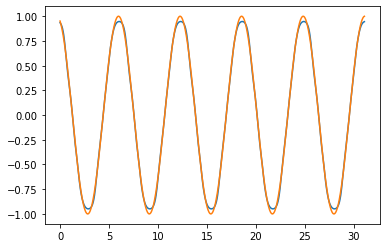

In [14]:
seq_data = []
for i in np.arange(0,1000):
  seq_data += [[np.cos(np.pi*i*0.01)]]

X,y = make_sample(seq_data, 10)

y_pred = model.predict(X, verbose=0)
plt.plot(np.pi * np.arange(0, 990)*0.01, y_pred )
plt.plot(np.pi * np.arange(0, 990)*0.01, y)
plt.show()

# 케라스를 이용한 주가 예측

In [15]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

samsung = fdr.DataReader('005930', '2016')
print(samsung)

openValues = samsung[['Open']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(openValues)

TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

             Open   High    Low  Close    Volume    Change
Date                                                      
2016-01-04  25200  25200  24100  24100    306939 -0.043651
2016-01-05  24040  24360  23720  24160    216002  0.002490
2016-01-06  24160  24160  23360  23500    366752 -0.027318
2016-01-07  23320  23660  23020  23260    282388 -0.010213
2016-01-08  23260  23720  23260  23420    257763  0.006879
...           ...    ...    ...    ...       ...       ...
2022-05-25  66700  67100  65900  66400  15150490 -0.001504
2022-05-26  66300  67200  65500  65900  15970890 -0.007530
2022-05-27  66700  66900  66200  66500  11405555  0.009105
2022-05-30  67500  67800  66900  67700  14255484  0.018045
2022-05-31  67500  67500  66700  66800   5675457 -0.013294

[1576 rows x 6 columns]


In [16]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
                input_shape=(X_train.shape[1], 1), 
                activation='tanh', 
                return_sequences=False)
          )
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
85/85 [==============================] - 3s 10ms/step - loss: 0.0243
Epoch 2/100
85/85 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 3/100
85/85 [==============================] - 1s 10ms/step - loss: 9.9055e-04
Epoch 4/100
85/85 [==============================] - 1s 10ms/step - loss: 9.9310e-04
Epoch 5/100
85/85 [==============================] - 1s 10ms/step - loss: 9.4543e-04
Epoch 6/100
85/85 [==============================] - 1s 10ms/step - loss: 9.5234e-04
Epoch 7/100
85/85 [==============================] - 1s 10ms/step - loss: 9.4274e-04
Epoch 8/100
85/85 [==============================] - 1s 10ms/step - loss: 9.5263e-04
Epoch 9/100
85/85 [==============================] - 1s 11ms/step - loss: 9.4095e-04
Epoch 10/100
85/85 [==============================] - 1s 14ms/step - loss: 9.2329e-04
Epoch 11/100
85/85 [==============================] - 2s 19ms/step - loss: 9.3157e-04
Epoch 12/100
85/85 [==============================] - 1s 17ms/step - lo

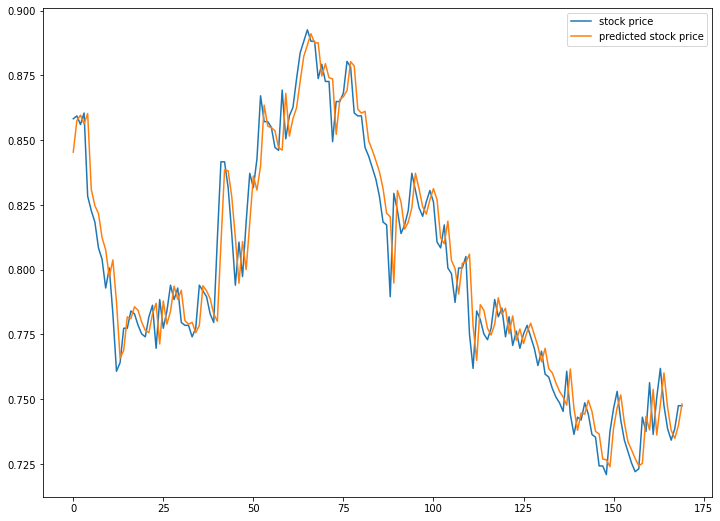

In [19]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()